# 梯度计算

## 1. 非标量变量的反向传播

当y不是标量时，向量y关于向量x的导数的最自然解释是一个矩阵。 对于高阶和高维的y和x，求导的结果可以是一个高阶张量。

然而，虽然这些更奇特的对象确实出现在高级机器学习中（包括深度学习中）， 但当调用向量的反向计算时，我们通常会试图计算一批训练样本中每个组成部分的损失函数的导数。 这里，我们的目的不是计算微分矩阵，而是单独计算批量中每个样本的偏导数之和。

pytorch中的向量梯度求导见下
<img src='https://cdn.jsdelivr.net/gh/Huangl19/imgbed/202405301908306.png' width=100% height=100%>

In [1]:
import torch
import utils

In [21]:
x = torch.arange(4.0)  # 仅浮点数可以设置梯度
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的 
x.requires_grad_(True)
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [ ]:
y.sum().backward()

当输出为标量时，可以直接使用backward()计算梯度  
当输出为二维以上张量时，需要填入与输出相同shape的权重张量

In [13]:
x.grad.zero_()
t = torch.tensor([1,2,3,4])
y = x * x
y.backward(t)
x.grad

## 2. 分离计算

使用 detach() 阻塞梯度流

In [16]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

由于记录了y的计算结果，我们可以随后在y上调用反向传播， 得到y=x ** x关于的 x 的导数，即2 * * x。

In [17]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

## 3. Python控制流的梯度计算

In [18]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [28]:
a = torch.randn(size=(2,2), requires_grad=True)
d = f(a)
d.sum().backward()

In [29]:
a.grad == d / a

tensor([[True, True],
        [True, True]])

## 4. 绘制sin(x) 与 其导数的曲线

In [33]:
x = torch.arange(0, 10, 0.1)
x.requires_grad_(True)
y = torch.sin(x)
y.backward(torch.ones_like(y))  # 利用autograd向量自动求导机制计算
grad = x.grad

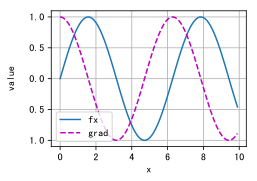

In [34]:
utils.plot(x.reshape(-1).detach(), Y=[y.reshape(-1).detach(), x.grad.reshape(-1)], xlabel='x', ylabel='value', legend=['fx','grad'], xscale='linear', yscale='linear')

## 5. 常见计算问题

w -= w.grad  不同于下式  
w = w - w.grad  w 会变为一个新的变量